In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer 
from sklearn.feature_selection import SelectFromModel
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import *
from tpot import TPOTClassifier 
import seaborn as sns
sns.set()
pd.options.display.max_rows = None
pd.options.display.max_columns = None

/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
raw_data = pd.read_excel('/Users/aryamonani/Desktop/Final Year Project/Covid 19 Blood test.xlsx')

In [3]:
raw_data.info() #datatypes in the dataset.
raw_data.sample(10) #takes 10 rows randomly from the dataset and displays it. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
520,79696d7a81ff5dd,4,negative,0,0,0,-0.289922,-0.084996,-0.090311,-0.325903,-0.215342,-0.449248,0.74204,0.013919,0.387152,0.230447,0.260116,-0.154280,0.935337,-0.182790,NaN,not_detected,not_detected,detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0.159424,-0.365042,NaN,-0.563567,0.682859,-0.934388,negative,negative,-0.035528,-0.239617,-0.35307,-0.174908,-0.003205,-0.278654,-0.319535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.360905,0.23996,-0.133197,NaN,NaN,-0.515714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934,8707b476a6bd4dd,1,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2538,e25ae1b0bd1b45d,17,negative,0,0,0,0.259404,-0.022340,0.160925,2.703313,-0.003778,0.650998,-0.95079,-0.481418,1.303529,-0.083183,0.555092,0.426576,-0.193981,0.171035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.643671,NaN,-0.465817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
raw_data.shape #rows and columns.

(5644, 111)

In [5]:
raw_data.describe(include = 'all') #gives a description of the dataset. I am concerned with the count for now.

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644,5644.000000,5644,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.010000e+02,6.020000e+02,2.080000e+02,1354,1354,1354,1352,1352,1352,0.0,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,1352,5.130000e+02,3.970000e+02,5.060000e+02,4.240000e+02,3.710000e+02,3.700000e+02,820,820,2.250000e+02,2.260000e+02,1.530000e+02,1.820000e+02,1.820000e+02,1.820000e+02,1.440000e+02,5.000000e+01,332,4.000000e+01,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.0,1.360000e+02,1.360000e+02,1.360000e+02,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.0,60,70,70,70,70,57,1,7.000000e+01,69,60,0.0,70,70,7.000000e+01,67,69,70,70,0.0,9.100000e+01,1.330000e+02,1.010000e+02,0.0,3.000000e+00,1.040000e+02,2.300000e+01,2.700000e+01,8.000000e+00,0.0,1.300000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
unique,5644,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,NaN,2,2,2,2,2,2,2,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,15,3,2,2,1,NaN,2,2,NaN,31,5,NaN,1,1,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16c10675848fb29,NaN,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,n

In [6]:
null_series = raw_data.isnull().sum()
null_series # a lot of missing values

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinoph

In [7]:
good_cols = null_series[null_series < raw_data.shape[0]/20].reset_index()
good_cols.head() #get all variables without any missing values

,index,0
0,Patient ID,0
1,Patient age quantile,0
2,SARS-Cov-2 exam result,0
3,"Patient addmited to regular ward (1=yes, 0=no)",0
4,Patient addmited to semi-intensive unit (1=yes...,0


In [8]:
raw_data_good = raw_data[good_cols['index']]
raw_data_good.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,44477f75e8169d2,13,negative,0,0,0
1,126e9dd13932f68,17,negative,0,0,0
2,a46b4402a0e5696,8,negative,0,0,0
3,f7d619a94f97c45,5,negative,0,0,0
4,d9e41465789c2b5,15,negative,0,0,0


In [9]:
raw_data_good.describe(include = 'all') #all variables except patient age qantile are categorical

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
count,5644,5644.000000,5644,5644.000000,5644.000000,5644.000000
unique,5644,NaN,2,NaN,NaN,NaN
top,16c10675848fb29,NaN,negative,NaN,NaN,NaN
freq,1,NaN,5086,NaN,NaN,NaN
mean,NaN,9.318391,NaN,0.013997,0.008859,0.007264
std,NaN,5.777903,NaN,0.117489,0.093713,0.084929
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000
25%,NaN,4.000000,NaN,0.000000,0.000000,0.000000
50%,NaN,9.000000,NaN,0.000000,0.000000,0.000000
75%,NaN,14.000000,NaN,0.000000,0.000000,0.000000


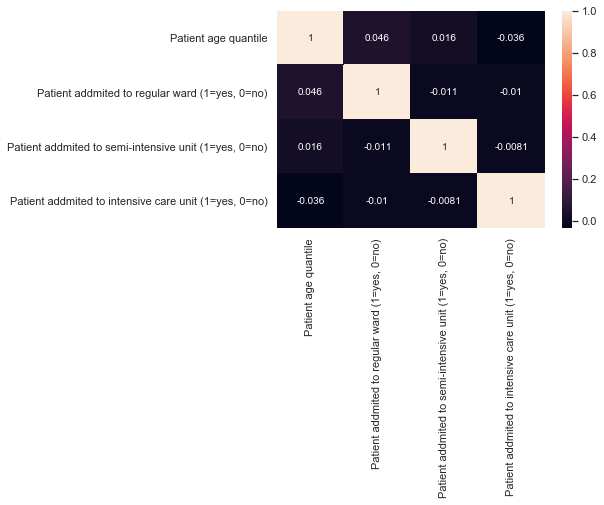

In [10]:
sns.heatmap(raw_data_good.corr(), annot = True)
plt.show()

In [11]:
corr_matrix = raw_data.corr().abs() #matrix is symmetric so we need to extract upper triangle matrix without diagonal
corr_matrix

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Sugar,Urine - Red blood cells,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,0.046166,0.015736,0.035772,0.096808,0.060320,0.158683,0.119449,0.037510,0.125935,0.124671,0.166386,0.107525,0.197394,0.022085,0.281655,0.050962,0.166429,2.158572e-01,NaN,8.692324e-02,0.338425,0.088205,0.372614,0.001904,0.004909,1.287946e-01,3.880901e-02,2.243824e-01,1.458134e-01,2.683060e-01,8.057336e-03,4.809063e-01,0.309841,1.276461e-01,0.208016,0.059379,0.555328,0.071306,NaN,0.503174,0.256466,0.510971,0.046603,0.284189,1.300393e-01,1.791793e-01,0.089347,NaN,1.183862e-01,NaN,1.596755e-01,NaN,1.228776e-01,1.403219e-02,1.497525e-01,NaN,0.981118,1.009930e-01,0.395562,9.713040e-02,0.357362,NaN,1.372904e-01,2.239493e-01,4.690486e-01,5.704452e-01,5.707553e-01,8.613310e-02,0.166245,0.098422,0.334562,5.117046e-01,6.126452e-02
"Patient addmited to regular ward (1=yes, 0=no)",0.046166,1.000000,0.011264,0.010192,0.087241,0.091867,0.183091,0.013134,0.053143,0.095313,0.034642,0.103005,0.031833,0.050703,0.085636,0.039326,0.000354,0.102160,5.874583e-02,NaN,1.274313e-01,0.012487,0.132841,0.085025,0.027274,0.087195,3.844180e-03,6.919801e-03,3.219143e-02,3.003846e-02,9.976999e-03,3.989793e-02,5.523086e-02,0.186539,5.717164e-03,0.136158,0.088179,0.041685,0.070782,NaN,0.040536,0.180598,0.033669,0.084794,0.063084,3.059950e-02,3.427745e-02,0.069894,NaN,2.023884e-01,NaN,4.852000e-02,NaN,2.389537e-02,1.003308e-01,1.177641e-01,NaN,NaN,8.047041e-02,0.410411,7.608530e-02,0.315823,NaN,NaN,1.981858e-01,2.267779e-01,3.345615e-02,2.036405e-01,1.598026e-01,0.133434,0.105608,0.173663,NaN,2.731019e-01
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.015736,0.011264,1.000000,0.008087,0.182215,0.177142,0.006966,0.023475,0.137951,0.110574,0.023390,0.138304,0.132984,0.054479,0.089780,0.050871,0.037916,0.092406,1.983279e-01,NaN,8.739030e-02,0.081907,0.241026,0.033972,0.013936,0.127343,2.205054e-02,8.454582e-02,1.580649e-01,2.654914e-02,5.903745e-02,7.131259e-03,2.962993e-01,0.033610,7.857459e-03,0.160453,0.151258,0.026309,0.183427,NaN,0.104426,0.136008,0.097108,0.184783,0.082809,2.386304e-01,2.788114e-01,0.416115,NaN,1.411161e-01,NaN,3.942273e-01,NaN,1.831855e-01,8.321416e-02,1.912163e-01,NaN,0.615038,1.060318e-03,0.084403,2.439135e-02,NaN,NaN,6.611111e-01,5.591175e-01,1.131533e-01,2.262345e-01,1.789710e-01,1.126242e-01,0.136503,0.338690,0.091269,

In [12]:
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol[sol > 0.5] #upper triangle matrxi from the corr matrix, values higher than 0.5.

pH (arterial blood gas analysis)                       Phosphor                                     1.000000
Ferritin                                               Lipase dosage                                1.000000
Serum Glucose                                          Lipase dosage                                1.000000
Creatine phosphokinase (CPK)                           Lipase dosage                                1.000000
Lactic Dehydrogenase                                   Phosphor                                     1.000000
Phosphor                                               ctO2 (arterial blood gas analysis)           1.000000
Vitamin B12                                            Ferritin                                     1.000000
Base excess (venous blood gas analysis)                Lipase dosage                                1.000000
Hb saturation (venous blood gas analysis)              Lipase dosage                                1.000000
HCO3 (venous blood 

In [13]:
raw_data.groupby("SARS-Cov-2 exam result").count()

,Patient ID,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
SARS-Cov-2 exam result,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
negative,5086,5086,5086,5086,5086,520,520,519,518,519,519,519,519,519,519,519,519,518,519,175,1242,1242,1242,1240,1240,1240,0,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,438,338,436,362,313,312,758,758,185,186,123,142,142,142,115,44,318,35,116,116,116,116,1,116,116,116,88,88,88,88,88,88,49,58,58,58,58,48,1,58,57,50,0,58,58,58,56,57,58,58,0,76,110,75,0,3,81,21,14,5,0,13,14,14,14,14,14,14,14,11,19,14
positive,558,558,558,558,558,83,83,83,81,83,83,83,83,83,83,83,83,83,83,33,112,112,112,112,112,112,0,112,112,112,112,112,112,112,112,112,112,112,75,59,70,62,58,58,62,62,40,40,30,40,40,40,29,6,14,5,20,20,20,20,0,20,20,20,9,9,9,9,9,9,11,12,12,12,12,9,0,12,12,10,0,12,12,12,11,12,12,12,0,15,23,26,0,0,23,2,13,3,0,0,13,13,13,13,13,13,13,9,1,13


In [14]:
raw_data['Urine - pH'].replace('Não Realizado', np.nan, inplace = True)
raw_data['Urine - Leukocytes'].replace('<1000', '999', inplace=True)
raw_data['Urine - pH'] = raw_data['Urine - pH'].astype("float64")
raw_data['Urine - Leukocytes'] = raw_data['Urine - Leukocytes'].astype("float64")
raw_data.dtypes[(raw_data.dtypes == "object")].index #fixing some columns

Index(['Patient ID', 'SARS-Cov-2 exam result', 'Respiratory Syncytial Virus',
       'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
       'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2',
       'Influenza B, rapid test', 'Influenza A, rapid test', 'Strepto A',
       'Urine - Esterase', 'Urine - Aspect', 'Urine - Hemoglobin',
       'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite',
       'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Crystals',
       'Urine - Hyaline cylinders', 'Urine - Granular cylinders',
       'Urine - Yeasts', 'Urine - Color'],
      dtype='object')

# Removing not usefull columns.

In [16]:
data_useful = raw_data.drop(['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)'], axis = 1)

In [17]:
data_result = pd.concat([data_useful, pd.get_dummies(data_useful[data_useful.dtypes[(data_useful.dtypes == "object")].index])], axis=1).drop(
    data_useful.dtypes[(data_useful.dtypes == "object")].index, axis=1).drop([
    'SARS-Cov-2 exam result_negative',
    'Respiratory Syncytial Virus_not_detected',
    'Influenza A_not_detected',
    'Influenza B_not_detected',
    'Parainfluenza 1_not_detected',
    'CoronavirusNL63_not_detected',
    'Rhinovirus/Enterovirus_not_detected',
    'Coronavirus HKU1_not_detected',
    'Parainfluenza 3_not_detected',
    'Chlamydophila pneumoniae_not_detected',
    'Adenovirus_not_detected',
    'Parainfluenza 4_not_detected',
    'Coronavirus229E_not_detected',
    'CoronavirusOC43_not_detected',
    'Inf A H1N1 2009_not_detected',
    'Bordetella pertussis_not_detected',
    'Metapneumovirus_not_detected',
    'Influenza B, rapid test_negative',
    'Influenza A, rapid test_negative',
    'Urine - Esterase_not_done',
    'Urine - Hemoglobin_not_done',
    'Urine - Hemoglobin_absent',
    'Strepto A_not_done',
    'Urine - Bile pigments_not_done',
    'Urine - Ketone Bodies_not_done',
    'Urine - Nitrite_not_done',
    'Urine - Urobilinogen_not_done',
    'Urine - Protein_not_done'
], axis=1)

In [18]:
list(data_result.columns)

['Patient age quantile',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Mycoplasma pneumoniae',
 'Neutrophils',
 'Urea',
 'Proteina C reativa mg/dL',
 'Creatinine',
 'Potassium',
 'Sodium',
 'Alanine transaminase',
 'Aspartate transaminase',
 'Gamma-glutamyltransferase\xa0',
 'Total Bilirubin',
 'Direct Bilirubin',
 'Indirect Bilirubin',
 'Alkaline phosphatase',
 'Ionized calcium\xa0',
 'Magnesium',
 'pCO2 (venous blood gas analysis)',
 'Hb saturation (venous blood gas analysis)',
 'Base excess (venous blood gas analysis)',
 'pO2 (venous blood gas analysis)',
 'Fio2 (venous blood gas analysis)',
 'Total CO2 (venous blood gas analysis)',
 'pH (venous blood gas analysis)',
 'HCO3 (ve

# Making a pipeline with undersampling, scaler, imputer and feature selecter.

In [ ]:
def pipeline(x , y , model = RandomForesetClassifier(random_state = 42)):
    pipeline = Pipeline([
        ('imputer', SimpleImputer(missing_values = np.nan, strategry = 'median')),
        ('normalizer', StandardScaler()), 
        
    ])